1️⃣ What is a Support Vector Machine (SVM)?

SVM is a supervised machine learning algorithm used for classification and regression that aims to find the optimal decision boundary (hyperplane) that maximizes the margin between different classes.

Question 2 :  What is the difference between Hard Margin and Soft Margin SVM4

| Hard Margin                                 | Soft Margin                                 |
| ------------------------------------------- | ------------------------------------------- |
| Assumes data is **perfectly separable**     | Allows **misclassification**                |
| No tolerance for errors                     | Includes **slack variable** to allow errors |
| Can lead to overfitting if noise is present | More general and robust to noise            |


3️⃣ Mathematical intuition behind SVM

Maximize the margin between closest data points (support vectors) and the separating hyperplane.
Objective:

Maximize 2/[∣𝑤∣]

Subject to correct classification constraints.
This ensures best generalization.

4️⃣ Role of Lagrange Multipliers in SVM

Used to convert a constrained optimization problem into an unconstrained dual formulation, making it easier to solve using kernels.

5️⃣ What are Support Vectors?

Data points that lie closest to the decision boundary and determine the position of the hyperplane. Removing them changes the model.

6️⃣ What is a Support Vector Classifier (SVC)?

SVM used specifically for classification tasks, separating classes via optimal hyperplane.

7️⃣ What is a Support Vector Regressor (SVR)?

Variant of SVM used for regression.
It fits a function such that predictions are within a ε-tube and penalizes points that lie outside the tube.

8️⃣ What is the Kernel Trick in SVM?

A technique to transform linearly inseparable data into a higher-dimensional space using kernel functions without explicitly computing the transformation.

9️⃣ Compare Linear, Polynomial, and RBF Kernels

| Kernel         | Use-case                 | Pros                  | Cons                    |
| -------------- | ------------------------ | --------------------- | ----------------------- |
| Linear         | Linearly separable data  | Simple, fast          | Poor for nonlinear data |
| Polynomial     | Curved boundaries        | Captures interactions | Sensitive to degree     |
| RBF (Gaussian) | Most real-world problems | Very flexible         | Needs tuning (C, γ)     |


🔟 Effect of the C parameter in SVM

| Low C                          | High C                 |
| ------------------------------ | ---------------------- |
| Larger margin                  | Smaller margin         |
| More misclassification allowed | Less misclassification |
| Better generalization          | Risk of overfitting    |


1️⃣1️⃣ Role of Gamma in RBF Kernel SVM

Controls how far the influence of a single training example reaches.
| Low γ → smooth boundary | High γ → complex boundary |

1️⃣2️⃣ What is Naïve Bayes and why is it “Naïve”?

It is a probabilistic classifier based on Bayes’ Theorem assuming features are conditionally independent — this independence assumption is the “naïve” part.

1️⃣3️⃣ What is Bayes’ Theorem?

𝑃(𝐴∣𝐵)=(𝑃(𝐵∣𝐴)𝑃(𝐴)) / 𝑃(𝐵)

	​


1️⃣4️⃣ Gaussian, Multinomial, Bernoulli Naïve Bayes Differences
| Type               | Data Type           | Example                              |
| ------------------ | ------------------- | ------------------------------------ |
| **Gaussian NB**    | Continuous features | Iris dataset                         |
| **Multinomial NB** | Discrete counts     | Text classification                  |
| **Bernoulli NB**   | Binary features     | Spam detection (word present/absent) |


1️⃣5️⃣ When to use Gaussian Naïve Bayes?

When features follow a normal distribution (continuous numeric features).

1️⃣6️⃣ Key assumptions in Naïve Bayes

Features are conditionally independent

Each feature contributes equally and independently to classification

1️⃣7️⃣ Advantages & Disadvantages of Naïve Bayes

✔ Fast, works well with high-dimensional text data
✔ Requires small training data
✘ Independence assumption rarely true
✘ Performs poorly when correlation exists

1️⃣8️⃣ Why is Naïve Bayes good for text classification?

Text features are high-dimensional & sparse

Bag-of-words representation aligns with independence assumption

Very fast and needs less data

1️⃣9️⃣ Compare SVM vs Naïve Bayes

| SVM                                 | Naïve Bayes                                         |
| ----------------------------------- | --------------------------------------------------- |
| Works well on non-linear boundaries | Works well on linearly separable probabilistic data |
| Computationally expensive           | Very fast                                           |
| Best for continuous features        | Best for text                                       |
| Requires parameter tuning           | Minimal tuning                                      |


2️⃣0️⃣ How does Laplace Smoothing help in Naïve Bayes?

Prevents zero probability problems by adding a small value (1) to frequency counts:

𝑃(𝑤𝑖)=(𝑐𝑜𝑢𝑛𝑡(𝑤𝑖)+1)/(𝑁+𝑉)

Where V = vocabulary size.

In [1]:
# 1) Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
#22) Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear SVM
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)
linear_acc = accuracy_score(y_test, linear_model.predict(X_test))

# RBF SVM
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)
rbf_acc = accuracy_score(y_test, rbf_model.predict(X_test))

print("Linear Kernel Accuracy:", linear_acc)
print("RBF Kernel Accuracy:", rbf_acc)


Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


In [3]:
# 23) Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE):
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

# Feature scaling improves SVR performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.3551984619989418


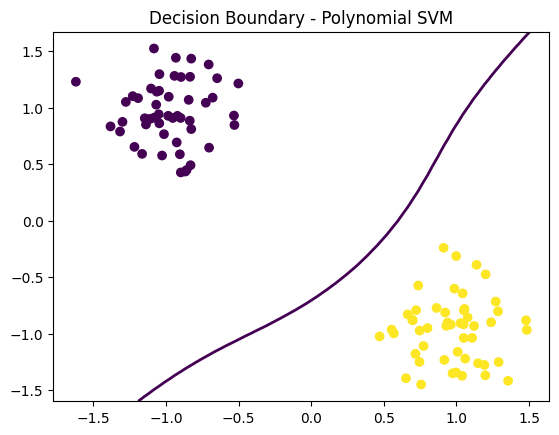

In [4]:
# 24)  Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Create dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

model = SVC(kernel='poly', degree=3)
model.fit(X, y)

# Plot decision boundary
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)

# Compute grid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Draw boundary
ax.contour(XX, YY, Z, levels=[0], linewidths=2)
plt.title("Decision Boundary - Polynomial SVM")
plt.show()


In [5]:
# 25)  Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9736842105263158


In [6]:
#26)Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load text data
data = fetch_20newsgroups(subset='all')
X, y = data.data, data.target

# Convert text → bag-of-words counts
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8742705570291777


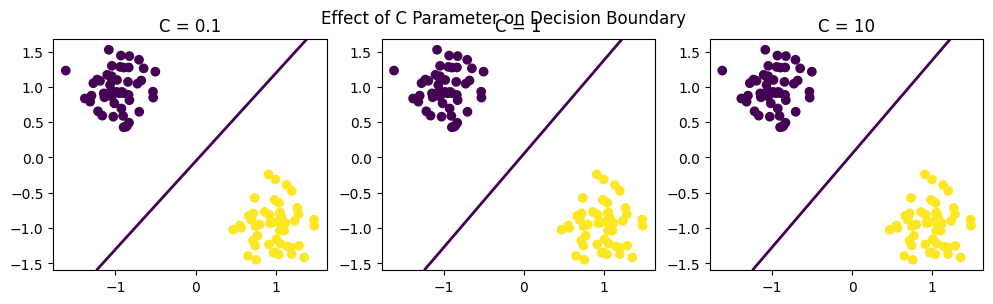

In [7]:
# 27) Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually=
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
X = StandardScaler().fit_transform(X)

C_values = [0.1, 1, 10]

plt.figure(figsize=(12, 3))
for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    ax = plt.subplot(1, 3, i + 1)
    ax.scatter(X[:, 0], X[:, 1], c=y)

    # Decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(*xlim, 50)
    yy = np.linspace(*ylim, 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, levels=[0], linewidths=2)
    ax.set_title(f"C = {C}")

plt.suptitle("Effect of C Parameter on Decision Boundary")
plt.show()


In [8]:
# 28) Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features=
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import numpy as np

# Create binary dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X = (X > 0).astype(int)  # binarize features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.805


In [9]:
#29) Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data=
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)

# Without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1 = SVC(kernel='rbf')
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

# With scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model2 = SVC(kernel='rbf')
model2.fit(X_train2, y_train2)
acc2 = accuracy_score(y_test2, model2.predict(X_test2))

print("Accuracy Without Scaling:", acc1)
print("Accuracy With Scaling:", acc2)


Accuracy Without Scaling: 0.8055555555555556
Accuracy With Scaling: 1.0


In [10]:
#30) Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing=
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without smoothing
model1 = GaussianNB(var_smoothing=1e-9)
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

# With smoothing
model2 = GaussianNB(var_smoothing=1e-6)
model2.fit(X_train, y_train)
acc2 = accuracy_score(y_test, model2.predict(X_test))

print("Default Smoothing:", acc1)
print("After Strong Laplace Smoothing:", acc2)


Default Smoothing: 0.9736842105263158
After Strong Laplace Smoothing: 0.956140350877193


In [11]:
#31) Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)=
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Score: 0.9583333333333334


In [12]:
#32) Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy=
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=2000, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without class weight
model1 = SVC()
model1.fit(X_train, y_train)
print("Without Class Weight:\n", classification_report(y_test, model1.predict(X_test)))

# With class weight balancing
model2 = SVC(class_weight='balanced')
model2.fit(X_train, y_train)
print("With Class Weight:\n", classification_report(y_test, model2.predict(X_test)))


Without Class Weight:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       367
           1       0.81      0.64      0.71        33

    accuracy                           0.96       400
   macro avg       0.89      0.81      0.84       400
weighted avg       0.95      0.96      0.96       400

With Class Weight:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       367
           1       0.51      0.88      0.64        33

    accuracy                           0.92       400
   macro avg       0.75      0.90      0.80       400
weighted avg       0.95      0.92      0.93       400



In [13]:
#33)  Write a Python program to implement a Naïve Bayes classifier for spam detection using email data=
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Example dataset (ham/spam)
data = pd.read_csv("spam.csv")[["v1", "v2"]]  # v1=label, v2=text
data.columns = ["label", "text"]

X = data["text"]
y = data["label"].map({"ham": 0, "spam": 1})

vec = TfidfVectorizer(stop_words="english")
X_vec = vec.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

In [14]:
# 34) Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy=
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVM Classifier
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Train Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

# Print comparison
print("SVM Accuracy:", svm_acc)
print("Naïve Bayes Accuracy:", nb_acc)


SVM Accuracy: 0.9473684210526315
Naïve Bayes Accuracy: 0.9736842105263158


In [15]:
# 35) Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results=
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = GaussianNB().fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=42)
model2 = GaussianNB().fit(X_train2, y_train2)
acc2 = accuracy_score(y_test2, model2.predict(X_test2))

print("Without FS:", acc1)
print("With FS:", acc2)


Without FS: 0.9736842105263158
With FS: 0.9736842105263158


In [16]:
#36) Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy=
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ovr = OneVsRestClassifier(SVC(kernel='rbf')).fit(X_train, y_train)
ovo = OneVsOneClassifier(SVC(kernel='rbf')).fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, ovo.predict(X_test)))


OvR Accuracy: 0.7777777777777778
OvO Accuracy: 0.8333333333333334


In [17]:
#37) Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy=
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for k in ['linear', 'poly', 'rbf']:
    acc = accuracy_score(y_test, SVC(kernel=k).fit(X_train, y_train).predict(X_test))
    print(k, "accuracy:", acc)


linear accuracy: 0.956140350877193
poly accuracy: 0.9473684210526315
rbf accuracy: 0.9473684210526315


In [18]:
#38) Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy=
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(SVC(kernel='rbf'), X, y, cv=cv)
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.9666666666666668


In [19]:
#39) Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance=
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for p in [None, [0.3, 0.7], [0.6, 0.4]]:
    model = GaussianNB(priors=p).fit(X_train, y_train)
    print("Priors:", p, "Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Priors: None Accuracy: 0.9736842105263158
Priors: [0.3, 0.7] Accuracy: 0.9649122807017544
Priors: [0.6, 0.4] Accuracy: 0.9736842105263158


In [20]:
#40) = Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy=
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfe = RFE(SVC(kernel='linear'), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

model = SVC(kernel='linear').fit(X_train_rfe, y_train)
print("Accuracy (RFE):", accuracy_score(y_test, model.predict(X_test_rfe)))


Accuracy (RFE): 0.9736842105263158


In [21]:
#41) Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy=
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC().fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [22]:
#42) Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)=
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB().fit(X_train, y_train)
probs = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))


Log Loss: 0.2037342715214191


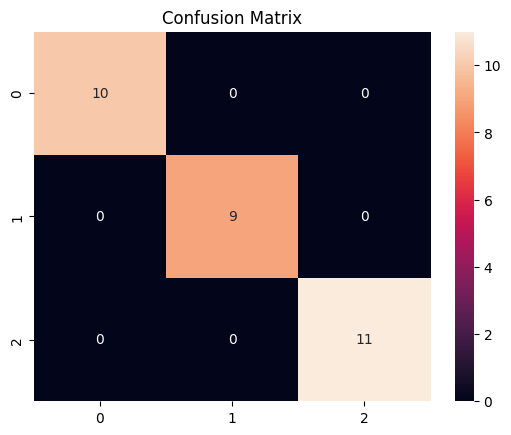

In [23]:
#43)  Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn=
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC().fit(X_train, y_train)
cm = confusion_matrix(y_test, model.predict(X_test))

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


In [24]:
#44) Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE=
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVR().fit(X_train, y_train)
print("MAE:", mean_absolute_error(y_test, model.predict(X_test)))


MAE: 0.3977630963437868


In [25]:
#45) Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score=
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB().fit(X_train, y_train)
prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, prob))


ROC-AUC: 0.9983622666229938


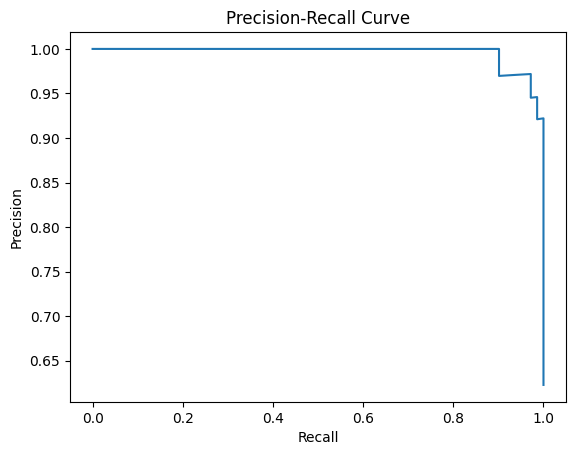

In [26]:
# 46)  Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(probability=True).fit(X_train, y_train)
prob = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
